<h2>Identificazione del tipo di rete</h2>

Importo la mia rete da file csv, grafo non orientato (quindi ogni arco vale si come uscente che entrante per ogni nodo)

In [19]:
import networkx as nx
import csv
import pandas as pd
import matplotlib.pyplot as plt

def _get_graph_file():
    G= nx.Graph()
    git = pd.read_csv('file.csv')
    G.add_weighted_edges_from(git.values)
    return G

G = _get_graph_file()

print("Rete originale:")
print("Nodi:",G.number_of_nodes())
print("Archi:",G.number_of_edges())



Rete originale:
Nodi: 6421
Archi: 171644


Controllo se ci sono componenti isolate e le elimino

In [22]:
#controllo se ci sono componenti isolate
components = list(nx.connected_components(G)) # list because it returns a generator
components.sort(key=len, reverse=True)
largest = components.pop(0)
num_isolated = G.order() - len(largest)
isolated = set( g for cc in components for g in cc )

#se ci sono, elimino quelle con meno di 100 elementi 
#(ovvero tutte quelle che non fanno parte del cluster originale)
for component in list(nx.connected_components(G)):
    if len(component)<100:
        for node in component:
            G.remove_node(node)
#print("isolated components:", num_isolated)

            
print("Rete senza componenti isolate")
print (nx.info(G))
print("Diametro:", nx.diameter(G))



Rete senza componenti isolate
Name: 
Type: Graph
Number of nodes: 6403
Number of edges: 171588
Average degree:  53.5961
Diametro: 5


in media ogni eroe ha contatti con 50 altri eroi.

Stampo i valori di CC e APL della rete originale

In [4]:
print("Clustering Coeficient",nx.average_clustering(G))
print("Average Shortest Path Length",nx.average_shortest_path_length(G))

Clustering Coeficient 0.7739198026984904
Average Shortest Path Length 2.6303105537211326


Creo una rete equivalente alla MARVEL network <br>
Nodi: 6421 <br>
Archi: 171644<br>
Ne calcolo poi CC e APL

In [42]:
GR = nx.gnm_random_graph(6403,171588, directed=False)

print("Average Clustering Coefficient",nx.average_clustering(GR))
print("Average Shortest Path Lenght",nx.average_shortest_path_length(GR))

Da questo deduco che la rete è di tipo small world

<h2>Identificazione dei nodi più importanti</h2>

I 5 Nodi con la più alta Betweeness centrality

In [8]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['SPIDER-MAN/PETER PARKER',
 'CAPTAIN AMERICA',
 'IRON MAN/TONY STARK',
 'WOLVERINE/LOGAN',
 'HAVOK/ALEX SUMMERS']

  Il nodo con il weighted degree più alto:

In [19]:
wdegree = dict(G.degree(weight='weight'))
max(G, key=wdegree.get)

'CAPTAIN AMERICA'

In [17]:
max_hero= max(G, key=G.degree)
print("l'eroe con più contatti è: ", max_hero)
print("i suoi vicini sono:")
list(G.neighbors(max_hero)) 


l'eroe con più contatti è:  CAPTAIN AMERICA
i suoi vicini sono:


['3-D MAN/CHARLES CHAN',
 '4-D MAN/MERCURIO',
 'ABOMINATION/EMIL BLO',
 'ABSORBING MAN/CARL C',
 'ACHEBE, REVEREND DOC',
 'ACHILLES II/HELMUT',
 'ACROBAT/CARL ZANTE',
 'ADAMS, CINDY',
 'ADAMS, NICOLE NIKKI',
 'ADORA',
 'AGAMEMNON III/',
 'AGENT AXIS/',
 'AJAK/TECUMOTZIN [ETE',
 'AJAX',
 'AKUTAGAWA, OSAMU',
 'ALANYA',
 'ALDEN, PROF. MEREDIT',
 'ALEXANDER, CALEB',
 'ALEXANDER, CARRIE',
 'ALVAREZ, FELIX',
 'AMERICAN EAGLE III/J',
 'AMERICAN EAGLE II/JA',
 'AMERICOP/',
 'AMPHIBIAN/KINGLEY RI',
 'ANACONDA/BLANCHE SIT',
 'ANCIENT ONE',
 'ANDROMEDA/ANDROMEDA',
 'ANELLE',
 'ANGAR THE SCREAMER/D',
 'ANGEL DOPPELGANGER',
 'ANGEL III/HALLOWAY',
 'ANGEL IV',
 'ANGEL/WARREN KENNETH',
 'ANGLER',
 'ANNIHILUS',
 'ANSWER II/DAVID FERR',
 'ANTHROMORPHO',
 'ANT-MAN/DR. HENRY J.',
 'ANT-MAN II/SCOTT HAR',
 'ANTOINETTE, MARIE',
 'APE MAN/GORDON MONK',
 'APE MAN II/ROY MCVEY',
 'APOCALYPSE/EN SABAH',
 'APOCRYPHUS',
 'APOLLO [GREEK GOD]',
 'AQUARIAN/WUNDARR',
 'AQUARIUS/DARREN BENT',
 'ARABIAN KNIGHT/ABDUL',

<b>Degree Centrality </b>

La misura del grado di centralità è il numero di vicini di ogni nodo diviso per il numero massimo di vicini che potrebbe avere. In un grafo non orientato, questo è $n-1$ dove $n$ è il numero totale di nodi del grafo.

L'output della funzione nx.degree_centrality è un dizionario le cui chiavi sono i nodi e il loro valore è il punteggio di centralità del grado. Le funzioni che implementano misure a livello di nodo in NetworkX, come i punteggi di centralità, restituiscono sempre il loro risultato come dizionario, con i nodi come chiavi e il punteggio concreto per quel nodo come valore.

In [28]:
from operator import itemgetter

In [21]:
degc = nx.degree_centrality(G)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('CAPTAIN AMERICA', 0.29975007810059356),
 ('SPIDER-MAN/PETER PARKER', 0.2739768822243049),
 ('IRON MAN/TONY STARK', 0.24461105904404873),
 ('THING/BENJAMIN J. GR', 0.22617931896282412),
 ('MR. FANTASTIC/REED R', 0.2211808809746954),
 ('HUMAN TORCH/JOHNNY S', 0.22055607622617932),
 ('WOLVERINE/LOGAN', 0.21587004061230863),
 ('SCARLET WITCH/WANDA', 0.21274601686972822),
 ('BEAST/HENRY &HANK& P', 0.2085285848172446),
 ('THOR/DR. DONALD BLAK', 0.20540456107466415),
 ('INVISIBLE WOMAN/SUE', 0.19884411121524523),
 ('VISION', 0.19415807560137457),
 ('HAWK', 0.1846298031865042),
 ('ANGEL/WARREN KENNETH', 0.1769759450171821),
 ('CYCLOPS/SCOTT SUMMER', 0.1769759450171821),
 ('ANT-MAN/DR. HENRY J.', 0.17432052483598875),
 ('WASP/JANET VAN DYNE', 0.17307091533895658),
 ('STORM/ORORO MUNROE S', 0.17072789753202125),
 ('SHE-HULK/JENNIFER WA', 0.1704154951577632),
 ('PROFESSOR X/CHARLES', 0.16994689159637613),
 ('DR. STRANGE/STEPHEN', 0.16994689159637613),
 ('HULK/DR. ROBERT BRUC', 0.16822867853795

La degree centrality indica la perfcentuale dei nodi a cui è connesso ogni nodo.

Captain America è connesso quasi al 30% della rete totale!

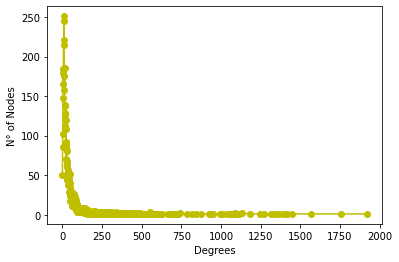

In [11]:
all_degrees = [val for (node, val) in G.degree()]
unique_degrees = list(set(all_degrees))
count_of_degrees = []
        
for i in unique_degrees:
    x=all_degrees.count(i)
    count_of_degrees.append(x)
        
plt.plot(unique_degrees, count_of_degrees, 'yo-')
plt.xlabel('Degrees')
plt.ylabel('N° of Nodes')
plt.show()
        


Rappresento graficamente la distribuzione del grado dei nodi. <br>
Otteniamo il seguente grafico, dal quale è possibile evincere che ci sono circa 100 nodi con un degree alto, mentre la maggior parte dei nodi ha un degree al di sotto del 20.

<b>Betweeness Centrality</b>

La betweeness Centrality di un nodo v è la somma della frazione dei cammini minimi di tutte le coppie che passano per v:
$$ c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

dove V è l'insieme dei nodi, $\sigma(s, t)$ è il numero di cammini più brevi (s, t) e $\sigma(s, t|v)$ è il numero di quei cammini che passano attraverso v.



In [22]:
#ci mette un sacco 
bet = nx.betweenness_centrality(G)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('SPIDER-MAN/PETER PARKER', 0.07204460717982197),
 ('CAPTAIN AMERICA', 0.05596671589099814),
 ('IRON MAN/TONY STARK', 0.03770633619637516),
 ('WOLVERINE/LOGAN', 0.03519963458219211),
 ('HAVOK/ALEX SUMMERS', 0.0351728898799486),
 ('DR. STRANGE/STEPHEN', 0.029305009293613304),
 ('THING/BENJAMIN J. GR', 0.025048027049570366),
 ('HAWK', 0.024556061663952355),
 ('HULK/DR. ROBERT BRUC', 0.023833890997933878),
 ('MR. FANTASTIC/REED R', 0.02365612173366362),
 ('THOR/DR. DONALD BLAK', 0.02331852976586244),
 ('DAREDEVIL/MATT MURDO', 0.0231095724216529),
 ('BEAST/HENRY &HANK& P', 0.022296439574551585),
 ('FURY, COL. NICHOLAS', 0.022111627145659313),
 ('HUMAN TORCH/JOHNNY S', 0.021661491772133338),
 ('JAMESON, J. JONAH', 0.01902149773556854),
 ('PUNISHER II/FRANK CA', 0.018911245748261904),
 ('SILVER SURFER/NORRIN', 0.018480302268076686),
 ('SCARLET WITCH/WANDA', 0.016772374617478786),
 ('SUB-MARINER/NAMOR MA', 0.015699161023577803),
 ('INVISIBLE WOMAN/SUE', 0.015622377847824196),
 ('WATSON-PARKE

<b>Closeness Centrality</b>

La Closeness centrality di un nodo u è il reciproco della somma delle distanze di cammino più brevi da u a tutti gli altri n-1 nodi. Poiché la somma delle distanze dipende dal numero di nodi nel grafico, la vicinanza è normalizzata dalla somma delle distanze minime possibili n-1.
$$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$$

dove d(v, u) è la distanza del cammino minimo tra v e u, ed n è il numero di nodi nel grafico. Notare che valori di prossimità più elevati indicano una centralità maggiore.

In [29]:
clos = nx.closeness_centrality(G)
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('CAPTAIN AMERICA', 0.5861027190332326),
 ('SPIDER-MAN/PETER PARKER', 0.5767048013692461),
 ('IRON MAN/TONY STARK', 0.565248101712873),
 ('THING/BENJAMIN J. GR', 0.5613327487943884),
 ('MR. FANTASTIC/REED R', 0.5595175668589407),
 ('HUMAN TORCH/JOHNNY S', 0.5590778097982709),
 ('WOLVERINE/LOGAN', 0.5570831883049078),
 ('SCARLET WITCH/WANDA', 0.5561636695334897),
 ('BEAST/HENRY &HANK& P', 0.5545738045738046),
 ('THOR/DR. DONALD BLAK', 0.5537104307213285),
 ('INVISIBLE WOMAN/SUE', 0.5519917227108122),
 ('VISION', 0.5496222527472527),
 ('CYCLOPS/SCOTT SUMMER', 0.5447583390061266),
 ('HAWK', 0.5433251294237461),
 ('STORM/ORORO MUNROE S', 0.542910447761194),
 ('ANGEL/WARREN KENNETH', 0.5426343448042041),
 ('HULK/DR. ROBERT BRUC', 0.5424504321301474),
 ('SHE-HULK/JENNIFER WA', 0.5422666440792817),
 ('WASP/JANET VAN DYNE', 0.5413953488372093),
 ('ANT-MAN/DR. HENRY J.', 0.5410293247697118),
 ('DR. STRANGE/STEPHEN', 0.5398431570958766),
 ('PROFESSOR X/CHARLES', 0.5396156439649359),
 ('WONDER M

Il nodo con la più alta closeness centrality ha il percorso minimo più corto con tutti gli altri nodi, per cui è il più rapido a contattare il numero più alto di eroi nel minor tempo possibile.

Di nuovo, Captain America è uno degli eroi più connessi, di fatto è connesso a tutta la rete con una media di poco più di mezzo hop.

In [32]:
clos['CAPTAIN AMERICA']

0.5861027190332326

<b>Eigenvector Centrality</b>

Assegna punteggi relativi ai nodi della rete in base a quanto i nodi con cui un nodo è connesso sono a loro volta connessi. <br>
Un nodo con una alta Eigenvector Centrality è connesso con nodi aventi a loro volta un alto punteggio.

In [34]:
eig = nx.eigenvector_centrality(G)
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('CAPTAIN AMERICA', 0.11423433119544253),
 ('IRON MAN/TONY STARK', 0.10189063956949355),
 ('THING/BENJAMIN J. GR', 0.10016271122458334),
 ('SCARLET WITCH/WANDA', 0.09990996942577986),
 ('MR. FANTASTIC/REED R', 0.09930617262050313),
 ('HUMAN TORCH/JOHNNY S', 0.09895302348665509),
 ('SPIDER-MAN/PETER PARKER', 0.09891423307668402),
 ('BEAST/HENRY &HANK& P', 0.09744838912431246),
 ('WOLVERINE/LOGAN', 0.09682293862280675),
 ('VISION', 0.09603059176613907),
 ('INVISIBLE WOMAN/SUE', 0.09505122213258292),
 ('THOR/DR. DONALD BLAK', 0.09323262254114491),
 ('CYCLOPS/SCOTT SUMMER', 0.09131845009698249),
 ('SHE-HULK/JENNIFER WA', 0.09111836142547755),
 ('ANGEL/WARREN KENNETH', 0.09053971622501228),
 ('WASP/JANET VAN DYNE', 0.09025301216759046),
 ('STORM/ORORO MUNROE S', 0.08775683854980647),
 ('PROFESSOR X/CHARLES', 0.08753660461714344),
 ('COLOSSUS II/PETER RA', 0.08750459398260475),
 ('HAWK', 0.08724047428498083),
 ('ANT-MAN/DR. HENRY J.', 0.08700268841021652),
 ('WONDER MAN/SIMON WIL', 0.086607

Scalo le misure trovate per una migliore interpretazione:

In [37]:
max_value= max(eig.items(), key=lambda x:x[1])

eig_scaled = {}
for k in eig.keys():
    eig_scaled[k]= eig[k] / max_value[1]

sorted(eig_scaled.items(), key=lambda x:x[1], reverse=True)

[('CAPTAIN AMERICA', 1.0),
 ('IRON MAN/TONY STARK', 0.8919441161271364),
 ('THING/BENJAMIN J. GR', 0.8768179423505865),
 ('SCARLET WITCH/WANDA', 0.8746054568730722),
 ('MR. FANTASTIC/REED R', 0.8693198584110503),
 ('HUMAN TORCH/JOHNNY S', 0.8662284135699733),
 ('SPIDER-MAN/PETER PARKER', 0.8658888448119201),
 ('BEAST/HENRY &HANK& P', 0.8530569409785299),
 ('WOLVERINE/LOGAN', 0.84758178745016),
 ('VISION', 0.8406456339455531),
 ('INVISIBLE WOMAN/SUE', 0.832072295061286),
 ('THOR/DR. DONALD BLAK', 0.8161523910148694),
 ('CYCLOPS/SCOTT SUMMER', 0.799395848352686),
 ('SHE-HULK/JENNIFER WA', 0.7976442849705483),
 ('ANGEL/WARREN KENNETH', 0.7925788620419956),
 ('WASP/JANET VAN DYNE', 0.7900690731333417),
 ('STORM/ORORO MUNROE S', 0.7682177295690912),
 ('PROFESSOR X/CHARLES', 0.7662898158643553),
 ('COLOSSUS II/PETER RA', 0.7660095968250902),
 ('HAWK', 0.7636975099519062),
 ('ANT-MAN/DR. HENRY J.', 0.7616159476730718),
 ('WONDER MAN/SIMON WIL', 0.7581595980456148),
 ('ICEMAN/ROBERT BOBBY', 0.

<b>Relazione tra centralità</b>

Analizzando le centralità di un nodo all'interno di una rete è importante pensare al tipo di relazioni che vengono modellate e scegliere la misura di centralità che si adatta meglio al nostro caso.

È utile mettere in relazione tra loro le misure di centralità per capire quanto le  informazioni siano ridondanti. Per farlo useremo Panda e Seaborn.

In [27]:
import pandas as pd
import seaborn as sns



centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality



,degree,betweenness,closeness,eigenvector
M'SHULLA,0.005311,0.000469,0.353136,0.000400
24-HOUR MAN/EMMANUEL,0.000781,0.000000,0.263132,0.000007
KILLRAVEN/JONATHAN R,0.005467,0.000717,0.356995,0.000524
G'RATH,0.000781,0.000000,0.263132,0.000007
"FROST, CARMILLA",0.004374,0.000398,0.352961,0.000392
...,...,...,...,...
SUNSET,0.000312,0.000000,0.365849,0.000591
STAR THIEF/,0.000156,0.000000,0.328881,0.000161
SYLPH,0.000469,0.000000,0.329507,0.000239
VIGIL,0.000156,0.000000,0.359542,0.000398


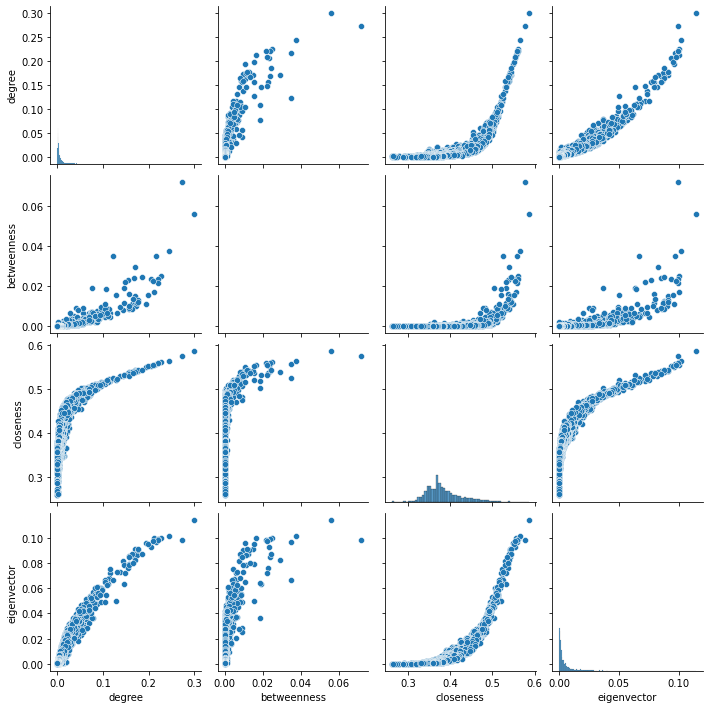

In [28]:
sns.pairplot(centrality)

Conclusioni??


<h2>Visualizzazione</h2>

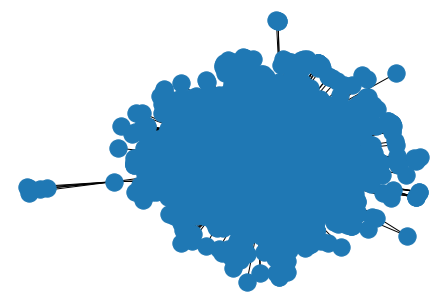

In [38]:
#visualizzazione semplice
nx.draw(G)

Non è molto chiaro, provo a visualizzarlo in modo più intelligente.

Il colore dei nodi varia a seconda del Degree, e la dimensione dei nodi a seconda della Betweeness Centrality.

(-0.9767866790294647,
 0.8885080277919769,
 -0.8084241926670075,
 1.086115437746048)

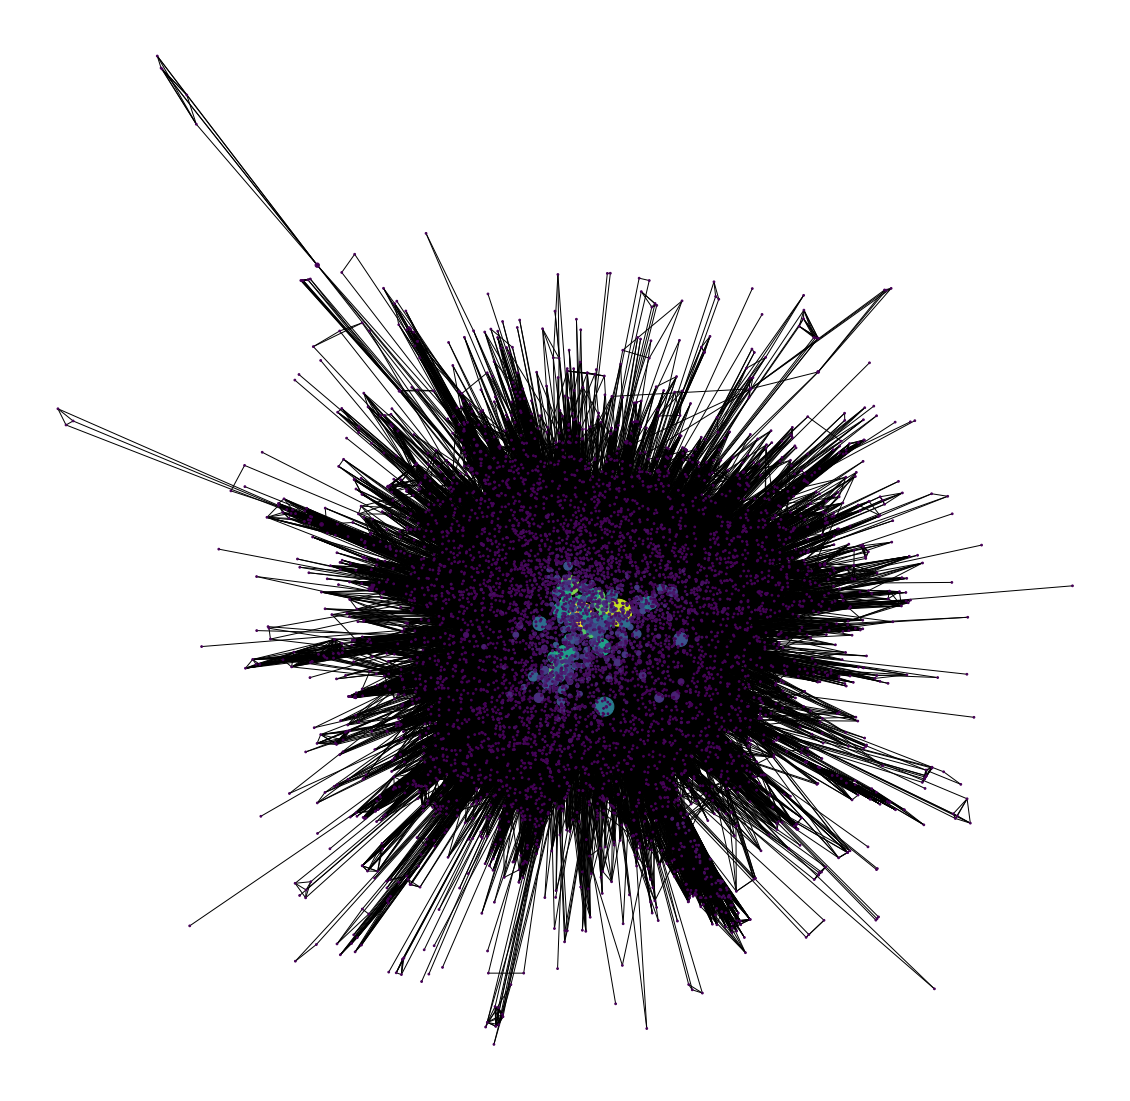

In [7]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

 <h2> Identificazione di community</h2>

In [16]:
print ("La densità della rete è di ", nx.density(G))

La densità della rete è di  0.008371778634107343


In [31]:
largest = max(nx.connected_components(G), key=len)
print( "dimensione della componente connessa più grande:", len(largest))

dimensione della componente connessa più grande: 6403


Analizzo l'importanza di ogni eroe nel mantenere il grafo connesso rimuovendo ogni nodo, controllando se il grafo rimane connesso dopo la rimozione, e calcolando la percentuale di nodi appartenenti al componente connesso più grande se la rimozione del nodo disconnette il grafo.

Questi nodi sono detti <i>articulation points</i>, e possono essere calcolati con una funzione dedicata (più veloce del metodo prima descritto)

In [39]:
for hero in G:
    H = G.copy()
    H.remove_node(hero)
    if not nx.is_connected(H):
        largest = max(nx.connected_components(H), key=len)
        percent = len(largest) / len(G) * 100
        print('{}: size of the largest connected component = {:.1f}%'.format(hero, percent))



WOODGOD: size of the largest connected component = 99.9%
WOLVERINE/LOGAN: size of the largest connected component = 99.8%
WEREWOLF BY NIGHT/JA: size of the largest connected component = 100.0%
WASP/JANET VAN DYNE: size of the largest connected component = 100.0%
THING/BENJAMIN J. GR: size of the largest connected component = 100.0%
SPIDER-MAN/PETER PARKER: size of the largest connected component = 100.0%
SHROUD/MAXIMILLIAN Q: size of the largest connected component = 100.0%
SHANNA/SHANNA O'HARA: size of the largest connected component = 99.9%
SCARLET WITCH/WANDA: size of the largest connected component = 100.0%
ROM, SPACEKNIGHT: size of the largest connected component = 100.0%
RED WOLF III/WILL TA: size of the largest connected component = 100.0%
NIGHTCRAWLER/KURT WA: size of the largest connected component = 100.0%
IRON MAN/TONY STARK: size of the largest connected component = 100.0%
IRON FIST/DANIEL RAN: size of the largest connected component = 100.0%
HUMAN TORCH/JOHNNY S: size of t

KeyboardInterrupt: 

In [34]:
set(nx.articulation_points(G))

{'ARABIAN KNIGHT/ABDUL',
 'BLACK WIDOW/NATASHA',
 'BLUE SHIELD/JOSEPH J',
 'CAPTAIN AMERICA',
 'CAPTAIN BRITAIN/BRIA',
 'COLLECTIVE MAN',
 'DAREDEVIL/MATT MURDO',
 'DAZZLER II/ALLISON B',
 'DEADPOOL/JACK/WADE W',
 'DR. DOOM/VICTOR VON',
 'DR. MIDAS/',
 'DR. STRANGE/STEPHEN',
 'DRACULA/VLAD TEPES',
 'FURY, COL. NICHOLAS',
 'GAMBIT/REMY LEBEAU',
 'GHOST RIDER III/DAN',
 'HELLSTORM/DAIMON HEL',
 'HULK/DR. ROBERT BRUC',
 'HUMAN TORCH/JOHNNY S',
 'IRON FIST/DANIEL RAN',
 'IRON MAN/TONY STARK',
 'KING, HANNIBAL/HENRY',
 'LIVING LIGHTNING/MIG',
 'LONGSHOT',
 'MAN-THING/THEODORE T',
 'MORBIUS/DR. MICHAEL',
 'NIGHTCRAWLER/KURT WA',
 'NOM',
 'RAVAGE/PROF. GEOFFRE',
 'RAWHIDE KID',
 'RED WOLF III/WILL TA',
 'ROM, SPACEKNIGHT',
 'ROSETTI, GABRIEL',
 'SCARLET WITCH/WANDA',
 'SHANG-CHI',
 "SHANNA/SHANNA O'HARA",
 'SHROUD/MAXIMILLIAN Q',
 'SIDEWINDER/SETH VOEL',
 'SILVER SURFER/NORRIN',
 'SKYHAWK/WINSTON BILL',
 'SPEEDBALL/ROBBIE BAL',
 'SPIDER-MAN/PETER PARKER',
 'THING/BENJAMIN J. GR',
 'USAGENT/CA

Quando rimuoviamo gli <i>articulation points</i> da un grafico otteniamo un insieme di sottografi per cui è succifiente rimuovere 2 o più nodi per scollegarli. Questi sono detti componenti biconnessi.


In [35]:
list(nx.biconnected_components(G))

[{'AKULIA',
  'CROSS-WALLACE, SIR G',
  'HELLER, ERIC',
  'MCHELE, JEREMY',
  "SHANNA/SHANNA O'HARA",
  'WILSON, DUBOSE'},
 {'ANIELLE',
  'BAPTISTE, TANTE MATT',
  'GAMBIT/REMY LEBEAU',
  'SISTER KATRINA',
  'STOKER, OLIVIER',
  'SYBIL'},
 {'ANANASTASIA/ANNA',
  'BLOODVESSEL, BUSTA',
  'DEADPOOL/JACK/WADE W',
  'PIERSON, FRED'},
 {'BLOOD-TIDE', 'MORBIUS/DR. MICHAEL', 'SAINT, AMANDA'},
 {'BECKMAN, CHARLES',
  'BECKMAN, JOSEPH',
  'BECKMAN, LISA',
  'BECKMAN, SARAH',
  'HELLSTORM/DAIMON HEL'},
 {'CHAKRA II', 'NOM'},
 {'BENNY, JAKE',
  'DOCTOR, DR. JOSHUA',
  'FILLMORE, BETTY',
  'FILLMORE, GARRET',
  'GALE, SHERIFF',
  'LILLIAN, BEA',
  'LONGSHOT',
  'NUTT',
  'THINGEE'},
 {'COVEY, LAWRENCE K.', 'SKYHAWK/WINSTON BILL'},
 {'CAPTAIN GLORY',
  'DR. MIDAS/',
  'MARVEL BOY VIII/NOH-',
  'MERREE',
  'OUBLIETTE/',
  'PLEX INTELLIGENCE'},
 {'DESADIA', 'ROSETTI, GABRIEL'},
 {'RAWHIDE KID', 'STARK, ISAAC', 'WIZARD OF THE WEST'},
 {'RED WOLF III/WILL TA', 'SPARROW BEAR, MELLIS'},
 {'KING, HANNIBAL/

In [18]:
# otteniamo un dictionary, in cui per ogni nodo otteniamo il valore di cc 
for i in nx.clustering(G).items():
    print(i)

("M'SHULLA", 0.3404634581105169)
('24-HOUR MAN/EMMANUEL', 1.0)
('KILLRAVEN/JONATHAN R', 0.32605042016806723)
("G'RATH", 1.0)
('FROST, CARMILLA', 0.4444444444444444)
('WOODGOD', 0.4168269230769231)
('3-D MAN/CHARLES CHAN', 0.8837555886736215)
('WONDER MAN/SIMON WIL', 0.10624759390639608)
('WOLVERINE/LOGAN', 0.0744589325254566)
('WHIZZER/ROBERT L. FR', 0.4798030916451969)
('WEREWOLF BY NIGHT/JA', 0.4466771323914181)
('WASP/JANET VAN DYNE', 0.09942799187317987)
('VISION', 0.08794369240694751)
('VALINOR', 0.6944361202677055)
('VANGUARD/NICOLAI KRY', 0.4214651868810033)
('VENUS II', 1.0)
('URSA MAJOR/MIKHAIL U', 0.6729220779220779)
('TRITON', 0.23587588743477889)
('TORPEDO III/BROCK JO', 0.4543166175024582)
('TIGRA/GREER NELSON', 0.22307441607821835)
('THOR/DR. DONALD BLAK', 0.07793114224699203)
('THING/BENJAMIN J. GR', 0.06960867788947986)
('TEXAS TWISTER/DREW D', 0.7172360248447205)
('TALISMAN', 0.9617086193745232)
('SUNFIRE/SHIRO YOSHID', 0.2743086094009577)
('SUB-MARINER/NAMOR MA', 0.10

('LUCAS, JAMES JR.', 0.8166666666666667)
('LUCAS, JAMES', 1.0)
('KICKBACK/RICHARD', 0.9696969696969697)
('STAR THIEF II', 1.0)
('MERLIN', 0.4097902097902098)
('MASTER ORDER', 0.5787114845938376)
('MARRINA/MARRINA SMAL', 0.4150137741046832)
('MANSLAUGHTER', 0.68)
('LORD CHAOS', 0.5412935323383085)
("KISMET/J'RIDIA STARD", 0.3689688765830898)
('KUBIK', 0.6486486486486487)
('INTERLOPER', 0.72)
('DRAGON OF THE MOON', 0.989010989010989)
('CROSS, GENEVIEVE', 0.9120879120879121)
('BLACK KNIGHT/SIR PER', 0.6003086419753086)
('BLACK MORAY', 1.0)
('BLAZE, ROXANNE SIMPS', 0.24347826086956523)
('BLOOD WRAITH/SEAN DO', 0.6201052016364699)
('CLOUD', 0.5016611295681063)
('ANDROS', 0.9366666666666666)
('TRAINER, DR. SEWARD', 0.4083333333333333)
('OSBORN, NORMIE', 0.2829410055216507)
('NARDI', 0.9366666666666666)
('MOLTEN MAN/MARK RAXT', 0.4819004524886878)
('MACINTOSH, ANN', 0.6413461538461539)
('LEWIS, DEVON', 0.4076598506978254)
('LEWIS, SHIRLEY WASHI', 0.30275482093663914)
('LASHER/', 0.93666666666

('BALABAN/', 1.0)
('ZANIAC II/THUG THATC', 0.8954248366013072)
('ZANIAC/BRAD WOLFE', 1.0)
("X'HOSS", 1.0)
('VOLLA', 0.7156448202959831)
('UTGARD-LOKI', 0.9492753623188406)
('TIWAZ', 0.89)
('TOOTHGNASHER', 1.0)
('TOOTHGRINDER', 1.0)
('SILENT ONE', 0.696969696969697)
('PENTIGAAR', 0.9066666666666666)
('OLSON, MRS.', 0.8428030303030303)
('NULLITRON', 1.0)
('NEFFETHESK', 0.7702702702702703)
('MUNIN', 0.7568710359408034)
('MILLENNIUM MONARCH', 1.0)
('MEGATAK', 0.925)
('MAGNIR', 0.7339901477832512)
('JUSTICE PEACE', 0.6926406926406926)
('INFINITY', 0.9871794871794872)
('HUGIN', 0.7568710359408034)
('HAROKIN [ASGARDIAN]', 0.6848484848484848)
('GUNTHAR', 1.0)
('GIRABOOR', 1.0)
('GAR-TOOM', 1.0)
('GARM', 1.0)
('ECCE [WATCHER]', 1.0)
('EXECUTIONER III/BRUT', 1.0)
('EILIF DRAGONSLAYER', 1.0)
('CYRA [ASGARDIAN]', 0.9538461538461539)
('CERANDA', 0.7139784946236559)
('BRONA', 0.7339901477832512)
('WINDSTORM/', 1.0)
('VIBRANIA/SHARA', 1.0)
('STAR THIEF III/DITMI', 0.6834677419354839)
('PHANTOM', 1.0)

('MONSTER FROM THE LOS', 1.0)
('COVEY, LAWRENCE K.', 0)
('LAYLA', 0.6666666666666666)
('TARGET', 1.0)
('SPORE', 1.0)
('LA BANDERA', 1.0)
('GEIST', 1.0)
('SHANE, BRIDGIT', 1.0)
('CREEP/', 1.0)
('TORPEDO', 1.0)
('CRIME-WAVE/HOLLIS', 0.9333333333333333)
('LINCOLN, WILLIAM WIL', 0.5777777777777777)
('CRIMEWAVE/', 1.0)
('RAZORBLADE/', 1.0)
('SLASHER II', 1.0)
('UNICORN II/', 1.0)
('CROMWELL, HAMILTON', 1.0)
('SAWYER, RYAN', 0.782051282051282)
('ROSE, MICHKA', 1.0)
('CROSSBONES II/', 1.0)
('POTTS, VIRGINIA PEPP', 1.0)
('PARSON/', 1.0)
('GUINNESS', 1.0)
('CROSS, HAROLD', 1.0)
('PEREZ, DET. CECILIA', 0.8928571428571429)
('LULLABY/FELICITY HOP', 1.0)
('LOVEJOY, FRANKLIN', 1.0)
('LANNING, DR.', 1.0)
('FIELDS, MARJORIE', 1.0)
('FIELDS, TODD', 1.0)
('FIELDS, PROF. WILLIA', 1.0)
("O'SHAUGNESSY, COLLEE", 1.0)
('CRUSHER II/JUAN APON', 1.0)
('TERRIGENE', 1.0)
("O'HOOLIHAN, SERGIUS", 0.9848484848484849)
('GRIMM, PETUNIA PENNY', 1.0)
('MARSHALL, GRANT', 0.9111111111111111)
('MAGNOR', 1.0)
('GRANITOR', 1

<b>Cliques</b>

In [41]:
cliques = list(nx.find_cliques(G))
[clique for clique in cliques if len(clique) > 2]

[['FU MANCHU',
  'SHANG-CHI',
  'RESTON, CLIVE',
  'WU, LEIKO',
  'TARR, BLACK JACK',
  'SHOCKWAVE ROBOT',
  'DR. DOOM/VICTOR VON',
  'RAZORFIST ROBOT'],
 ['FU MANCHU',
  'SHANG-CHI',
  'RESTON, CLIVE',
  'WU, LEIKO',
  'TARR, BLACK JACK',
  'SHADOW-HAND/LI CHUN',
  'ZARAN II'],
 ['FU MANCHU',
  'SHANG-CHI',
  'RESTON, CLIVE',
  'WU, LEIKO',
  'TARR, BLACK JACK',
  'SMITH, SIR DENIS NAY',
  'SHOCKWAVE/LANCASTER',
  'ZARAN/MAXIMILLIAN ZA',
  'SUEE, FAH LO'],
 ['FU MANCHU',
  'SHANG-CHI',
  'RESTON, CLIVE',
  'WU, LEIKO',
  'TARR, BLACK JACK',
  'SMITH, SIR DENIS NAY',
  'DR. DOOM/VICTOR VON',
  'RAZORFIST ROBOT'],
 ['FU MANCHU',
  'SHANG-CHI',
  'BYRD, NATHANIEL ALEX',
  'IRON FIST/DANIEL RAN',
  'SUN, LIN',
  'DIAMOND, BOB',
  'JACK OF HEARTS/JACK',
  "D'ANGELO, LIEUTENANT",
  'AYALA, FILIPPO',
  'WHITE TIGER/HECTOR A',
  'KNIGHT, MISTY',
  'BROWN, ABE'],
 ['FU MANCHU',
  'SHANG-CHI',
  'DAREDEVIL/MATT MURDO',
  'WU, LEIKO',
  'BLACK WIDOW/NATASHA',
  'DR. DOOM/VICTOR VON'],
 ['FU MANC


<b>$k$-cores</b> <br>
Il core number di un nodo è il più grande valore $k$ di un $k$-core che lo contiene.

In [42]:
nx.core_number(G)

{"M'SHULLA": 13,
 '24-HOUR MAN/EMMANUEL': 5,
 'KILLRAVEN/JONATHAN R': 13,
 "G'RATH": 5,
 'FROST, CARMILLA': 13,
 'WOODGOD': 46,
 '3-D MAN/CHARLES CHAN': 110,
 'WONDER MAN/SIMON WIL': 110,
 'WOLVERINE/LOGAN': 110,
 'WHIZZER/ROBERT L. FR': 110,
 'WEREWOLF BY NIGHT/JA': 110,
 'WASP/JANET VAN DYNE': 110,
 'VISION': 110,
 'VALINOR': 110,
 'VANGUARD/NICOLAI KRY': 110,
 'VENUS II': 11,
 'URSA MAJOR/MIKHAIL U': 110,
 'TRITON': 110,
 'TORPEDO III/BROCK JO': 110,
 'TIGRA/GREER NELSON': 110,
 'THOR/DR. DONALD BLAK': 110,
 'THING/BENJAMIN J. GR': 110,
 'TEXAS TWISTER/DREW D': 110,
 'TALISMAN': 110,
 'SUNFIRE/SHIRO YOSHID': 110,
 'SUB-MARINER/NAMOR MA': 110,
 'STORM/ORORO MUNROE S': 110,
 'STINGRAY/DR. WALTER': 110,
 'SPIDER-WOMAN/JESSICA': 110,
 'SPIDER-MAN/PETER PARKER': 110,
 'SLOAN, FRED': 44,
 'SNOWBIRD/NARYA/ANNE': 110,
 'SHROUD/MAXIMILLIAN Q': 110,
 'SHE-HULK/JENNIFER WA': 110,
 'SHAMROCK/MOLLY FITZG': 110,
 'SHAMAN/MICHAEL TWOYO': 110,
 "SHANNA/SHANNA O'HARA": 110,
 'SHADOWCAT/KATHERINE': 1